<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Открытие файлов и изучение общей информации" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Открытие файлов и изучение общей информации</a></span><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">4&nbsp;&nbsp;</span>Составление портрета пользователя каждого региона</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span><li><span> <span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Определение перспективного тарифа для телеком компании

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Шаг 1. Открытие файлов и изучение общей информации

Импортируем необходимые нам библиотеки

In [1]:
import numpy as np
import pandas as pd
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt

Прочитаем датафрейм

In [2]:
df_games = pd.read_csv('/datasets/games.csv')

Получим первые 50 строк таблицы

In [3]:
df_games.head(50)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Выведем общуж информацию о таблице

In [4]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Наблюдаем отсутствующие значения сразу в 6 столбюцах, причём в столбцах critical_score,user_score и rating их много.

<font color = "blue"> Спасибо, учту на будущее! Не видел таких вариантов ранее. </color>

# Шаг 2. Подготовка данных

Приведём столбец  Year_of_Release в целочисленный тип, избавимся от строчек, где отсутсвует год

In [5]:
df_games['Year_of_Release'] = df_games['Year_of_Release'].fillna(-1)
df_games['Year_of_Release'] = df_games['Year_of_Release'].astype('int')
df=df_games.query('Year_of_Release> 0')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
Name               16444 non-null object
Platform           16446 non-null object
Year_of_Release    16446 non-null int64
Genre              16444 non-null object
NA_sales           16446 non-null float64
EU_sales           16446 non-null float64
JP_sales           16446 non-null float64
Other_sales        16446 non-null float64
Critic_Score       7983 non-null float64
User_Score         9839 non-null object
Rating             9768 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Приведём все столбцы к нижнему регистру

In [6]:
df['Name']=df['Name'].str.lower()
df['Platform']=df['Platform'].str.lower()
df['Genre']=df['Genre'].str.lower()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

Заполним столбцы пользовательских рейтингов и рейтингов критиков нулями. В дальнейшем при обработке будем брать срез, чтлбы отсекать пустые(нулевые) значения. Так же в столбце user_score есть пометки tbh - они относятся к играм либо ещё не вышедшим, либо вышедшим недавно и набравшим слишком мало отзывов - их тоже обработаем.

In [7]:
df['User_Score'] = df['User_Score'].fillna(value = 0)
df['Critic_Score'] = df['Critic_Score'].fillna(0)
df['User_Score'] = df['User_Score'].replace("tbd", np.nan)
df['User_Score'] = df['User_Score'].astype('float')
df['Critic_Score'] = df['Critic_Score'].astype('float')
df['Rating'] = df['Rating'].fillna(value = 'undefined')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
Name               16444 non-null object
Platform           16446 non-null object
Year_of_Release    16446 non-null int64
Genre              16444 non-null object
NA_sales           16446 non-null float64
EU_sales           16446 non-null float64
JP_sales           16446 non-null float64
Other_sales        16446 non-null float64
Critic_Score       16446 non-null float64
User_Score         14070 non-null float64
Rating             16446 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

В будущем мы встретимся с тем, что в столбцах NA,EU и JP_sales будет много знаков после запятой. Нас устроит точность до сотых.

In [8]:
df['NA_sales'] = round(df['NA_sales'],2)
df['EU_sales'] = round(df['EU_sales'],2)
df['JP_sales'] = round(df['JP_sales'],2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

# Шаг 3. Исследовательский анализ данных


Посмотрим, сколько игр выпускалось в разные годы

In [9]:
df_years_games = (df.pivot_table(index = ['Year_of_Release'],values = 'Name',aggfunc = 'count').reset_index())
df_years_games.columns = ['Year_of_Release','Name']
df_years_games.head(40)

,Year_of_Release,Name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Информацией до 1995-го года можно пренебречь - в те времена игры на всех платформах были недостаточно популярны, чем после 1995-го года. Плюс за 21 год сменилось несколько поколений игровых носителей, сменилось  поколение игроков.

In [10]:
df1_games = df.query('Year_of_Release > 1995')

In [11]:
df1_games_platform = (df1_games.pivot_table(index = ['Year_of_Release'],values = 'Platform',aggfunc = 'count').reset_index())
df1_games_platform.columns = ['Year_of_Release','Platform']
df1_games_platform.head(40)

,Year_of_Release,Platform
0,1996,263
1,1997,289
2,1998,379
3,1999,338
4,2000,350
5,2001,482
6,2002,829
7,2003,775
8,2004,762
9,2005,939


Создадим столбец с общим количеством продаж

In [12]:
df1_games['total_sales'] = df1_games[['NA_sales','EU_sales','JP_sales','Other_sales']].sum(axis=1)
print(df1_games['total_sales'].head(5))

0    82.54
2    35.52
3    32.77
4    31.38
6    29.80
Name: total_sales, dtype: float64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Построим сводную таблицу для общего количества продаж

In [13]:
df1_games_total_sales = (df1_games.pivot_table(index = ['Platform','Year_of_Release'],values = ['total_sales'],aggfunc = {'count','sum'}).reset_index())
df1_games_total_sales.columns = ['Platform','Year_of_Release','count','total_sales']
df1_games_total_sales.head(20)

,Platform,Year_of_Release,count,total_sales
0,3ds,2011,116,63.20
1,3ds,2012,93,51.36
2,3ds,2013,91,56.57
3,3ds,2014,80,43.76
4,3ds,2015,86,27.78
5,3ds,2016,46,15.14
6,dc,1998,7,3.38
7,dc,1999,14,5.16
8,dc,2000,20,5.99
9,dc,2001,8,1.07


Построим график зависимости количества проданных копий от года выпуска игры со всеми доступными платформами.
Для начала получим список всех платформ

In [14]:
df1_games['Platform'].value_counts()

ps2     2127
ds      2120
ps3     1306
wii     1286
x360    1232
psp     1193
ps      1074
pc       942
gba      811
xb       803
gc       542
3ds      512
psv      429
ps4      392
n64      316
xone     247
wiiu     147
sat      102
gb        60
dc        52
snes      37
ws         6
ng         2
pcfx       1
Name: Platform, dtype: int64

Посчитаем суммарное количество продаж для каждой платформаы

In [15]:
df1_sum_PS2= df1_games_total_sales.query('Platform == "ps2"')
df1_sum_DS= df1_games_total_sales.query('Platform == "ds"')
df1_sum_PS3= df1_games_total_sales.query('Platform == "ps3"')
df1_sum_Wii= df1_games_total_sales.query('Platform == "wii"')
df1_sum_X360= df1_games_total_sales.query('Platform == "x360"')
df1_sum_PSP= df1_games_total_sales.query('Platform == "psp"')
df1_sum_PS= df1_games_total_sales.query('Platform == "ps"')
df1_sum_PC= df1_games_total_sales.query('Platform == "pc"')
df1_sum_GBA= df1_games_total_sales.query('Platform == "gba"')
df1_sum_XB= df1_games_total_sales.query('Platform == "xb"')
df1_sum_GC= df1_games_total_sales.query('Platform == "gc"')
df1_sum_3DS = df1_games_total_sales.query('Platform == "3ds"')
df1_sum_PSV = df1_games_total_sales.query('Platform == "psv"')
df1_sum_PS4 = df1_games_total_sales.query('Platform == "ps4"')
df1_sum_N64 = df1_games_total_sales.query('Platform == "n64"')
df1_sum_XOne = df1_games_total_sales.query('Platform == "xone"')
df1_sum_WiiU = df1_games_total_sales.query('Platform == "wiiu"')
df1_sum_SAT = df1_games_total_sales.query('Platform == "sat"')
df1_sum_GB = df1_games_total_sales.query('Platform == "gb"')
df1_sum_DC = df1_games_total_sales.query('Platform == "dc"')
df1_summ_PS2 = df1_sum_PS2['total_sales'].sum()
df1_summ_DS = df1_sum_DS['total_sales'].sum()
df1_summ_PS3 = df1_sum_PS3['total_sales'].sum()
df1_summ_Wii = df1_sum_Wii['total_sales'].sum()
df1_summ_X360 = df1_sum_X360['total_sales'].sum()
df1_summ_PSP = df1_sum_PSP['total_sales'].sum()
df1_summ_PS = df1_sum_PS['total_sales'].sum()
df1_summ_PC = df1_sum_PC['total_sales'].sum()
df1_summ_GBA = df1_sum_GBA['total_sales'].sum()
df1_summ_XB = df1_sum_XB['total_sales'].sum()
df1_summ_GC = df1_sum_GC['total_sales'].sum()
df1_summ_3DS = df1_sum_3DS['total_sales'].sum()
df1_summ_PSV = df1_sum_PSV['total_sales'].sum()
df1_summ_PS4 = df1_sum_PS4['total_sales'].sum()
df1_summ_N64 = df1_sum_N64['total_sales'].sum()
df1_summ_XOne = df1_sum_XOne['total_sales'].sum()
df1_summ_WiiU = df1_sum_WiiU['total_sales'].sum()
df1_summ_SAT = df1_sum_SAT['total_sales'].sum()
df1_summ_GB = df1_sum_GB['total_sales'].sum()
df1_summ_DC = df1_sum_DC['total_sales'].sum()
print( 'PS2:',df1_summ_PS2)
print('DS:',df1_summ_DS)
print('PS3:',df1_summ_PS3)
print('Wii:',df1_summ_Wii)
print('X360:',df1_summ_X360)
print('PSP:',df1_summ_PSP)
print('PS:',df1_summ_PS)
print('PC:',df1_summ_PC)
print('GBA:',df1_summ_GBA)
print('XB:',df1_summ_XB)
print('GC:',df1_summ_GC)
print('3DS:',df1_summ_3DS)
print('PSV:',df1_summ_PSV)
print('PS4:',df1_summ_PS4)
print('N64:',df1_summ_N64)
print('XOne:',df1_summ_XOne)
print('WiiU:',df1_summ_WiiU)
print('SAT:',df1_summ_SAT)
print('GB:',df1_summ_GB)
print('DC:',df1_summ_DC)

PS2: 1233.5600000000004
DS: 802.7600000000011
PS3: 931.3400000000004
Wii: 891.1800000000001
X360: 961.2400000000005
PSP: 289.5300000000002
PS: 685.5900000000003
PC: 235.56999999999994
GBA: 312.8800000000001
XB: 251.57000000000008
GC: 196.72999999999993
3DS: 257.81000000000006
PSV: 53.80999999999997
PS4: 314.14000000000004
N64: 218.01000000000002
XOne: 159.32000000000005
WiiU: 82.19
SAT: 18.37
GB: 136.3
DC: 15.949999999999996


Построим так же наглядную таблицу, показываюущю распределение общих продаж по убыванию по всем платформам

In [16]:
df2_sum= df1_games_total_sales.query('Platform !="pcfx"& Platform !="snes" & Platform != "ws" & Platform != "ng"')     
df3_sum= (df2_sum.pivot_table(index = ['Platform'],values = 'total_sales',aggfunc = 'sum').reset_index()).sort_values(by = 'total_sales',ascending = False)
df3_sum.columns = ['Platform','total_sales']
df3_sum.head(20)

,Platform,total_sales
9,ps2,1233.56
17,x360,961.24
10,ps3,931.34
15,wii,891.18
2,ds,802.76
8,ps,685.59
11,ps4,314.14
4,gba,312.88
12,psp,289.53
0,3ds,257.81


Наблюдаем, что топ-10 по количеству продаж, это - PS2,X360,PS3,Wii,DS,PS,PS4,GBA,PSP,3DS.
Построим сводную таблицу для этих платформ

In [17]:
big_sales = df1_games_total_sales.query('Platform in["ps2","x360","ps3","wii","ds","ps","ps4","gba","psp","3ds"]')
print(big_sales)

    Platform  Year_of_Release  count  total_sales
0        3ds             2011    116        63.20
1        3ds             2012     93        51.36
2        3ds             2013     91        56.57
3        3ds             2014     80        43.76
4        3ds             2015     86        27.78
..       ...              ...    ...          ...
161     x360             2012    106        99.74
162     x360             2013     75        88.58
163     x360             2014     63        34.74
164     x360             2015     35        11.96
165     x360             2016     13         1.52

[94 rows x 4 columns]


Построим распределение по годам для этих платформ.

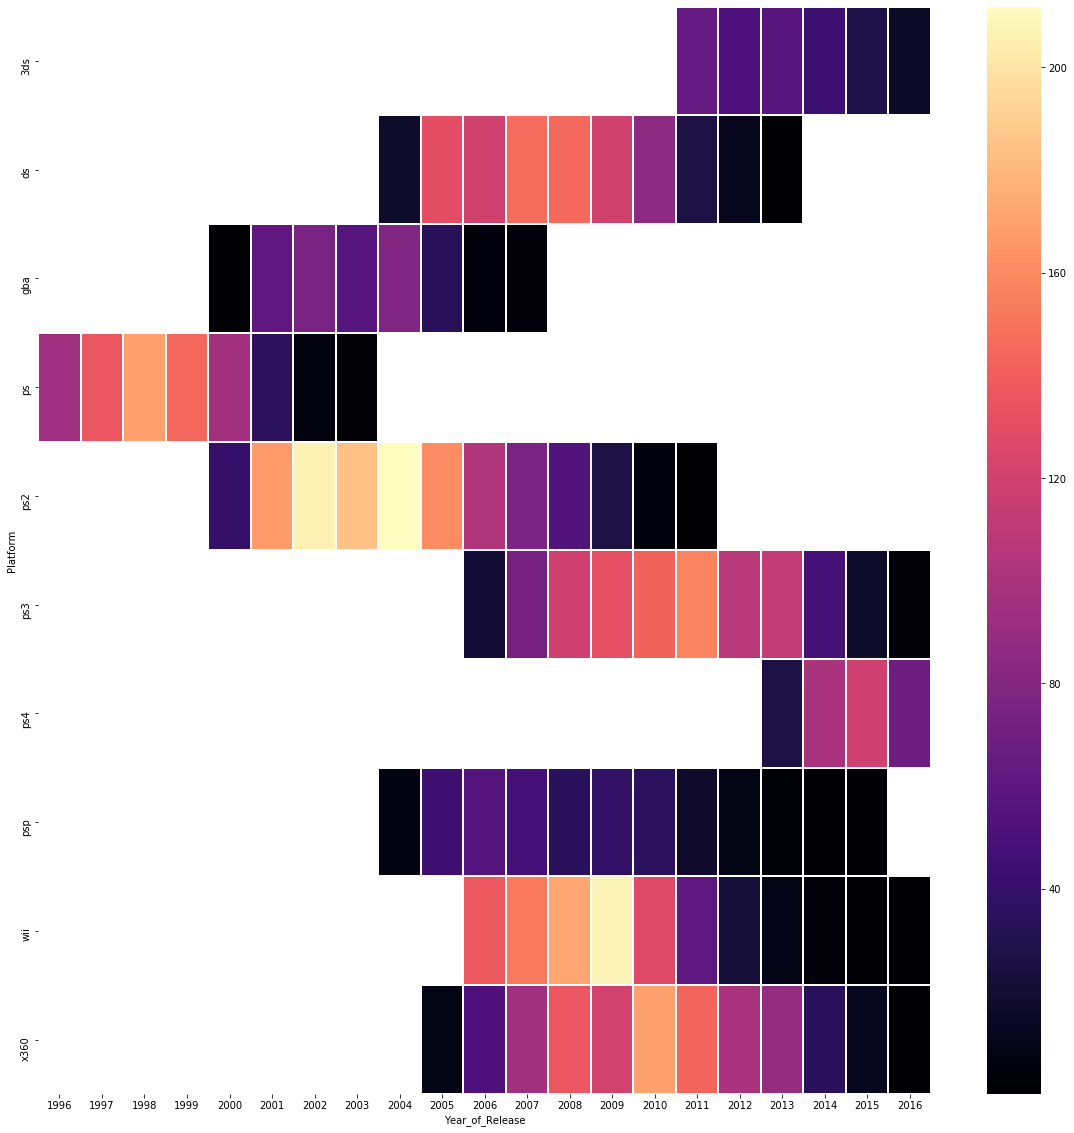

In [18]:
big_sales1 = big_sales.pivot_table(values='total_sales', index='Platform', columns='Year_of_Release')
##big_sales1.columns = ['Платформы','Годы']
plt.figure(figsize = (20,20))
ax = sns.heatmap(big_sales1,cmap='magma',linecolor='white',linewidths=1);
plt.show()

Видим, что каждые 4-5 лет появляются новые платформы и так же каждые 4-5 после появления новых уходят старые. Соответственно актуальным периодом для прогноза на 2017-ый год берём отрезок 2012-2016.
По графику видим, что все существующие на данный период платформы в течение этого времени имеют характерное понижение количества продаж, кроме PS4. В нашей выборке остались 5 платформ - X360,Wii,PS4,PS3.3DS

In [19]:
profit_sales = big_sales.query('Year_of_Release in["2012","2013","2014","2015","2016"] and Platform in ["3ds","ps3","ps4","wii","x360"]')
print(profit_sales)

    Platform  Year_of_Release  count  total_sales
1        3ds             2012     93        51.36
2        3ds             2013     91        56.57
3        3ds             2014     80        43.76
4        3ds             2015     86        27.78
5        3ds             2016     46        15.14
100      ps3             2012    148       107.36
101      ps3             2013    126       113.25
102      ps3             2014    108        47.76
103      ps3             2015     73        16.82
104      ps3             2016     38         3.60
105      ps4             2013     16        25.99
106      ps4             2014     75       100.00
107      ps4             2015    137       118.90
108      ps4             2016    164        69.25
141      wii             2012     31        21.71
142      wii             2013     12         8.59
143      wii             2014      6         3.75
144      wii             2015      4         1.14
145      wii             2016      1         0.18


Построим "ящик с усами" для каждой из пяти рассматриваемых платформ

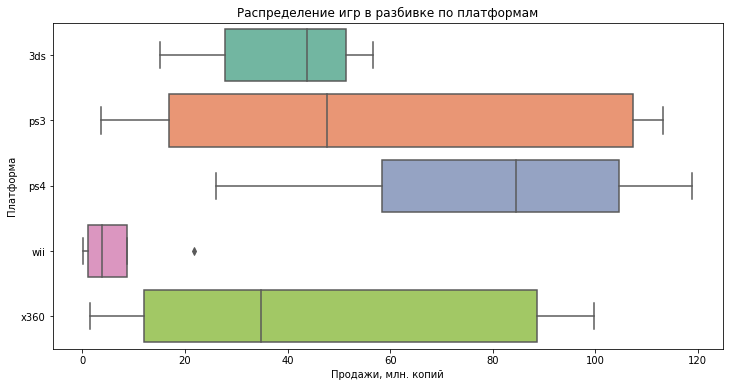

In [20]:
plt.figure(figsize = (12,6))
plt.title("Распределение игр в разбивке по платформам")
ax = sns.boxplot(x="total_sales", y="Platform", data=profit_sales, palette='Set2')
ax.set_xlabel("Продажи, млн. копий")
ax.set_ylabel("Платформа")
plt.show()

Наблюдаем следующую картину : у PS4 и PS3 cамые высокие средние результаты продаж игр

Далее возьмём платформу PS4 и исследуем её на зависимость продаж от отзывов пользователей и критиков.

In [21]:
df_critics = df1_games.query('Platform == "ps4" and Year_of_Release > 2011 and Critic_Score > 0')
print(df_critics )

                                        Name Platform  Year_of_Release  \
42                        grand theft auto v      ps4             2014   
77                                   fifa 16      ps4             2015   
92            call of duty: advanced warfare      ps4             2014   
94                                   fifa 17      ps4             2016   
105                                fallout 4      ps4             2015   
...                                      ...      ...              ...   
16486                     super dungeon bros      ps4             2016   
16499  sherlock holmes: the devil's daughter      ps4             2016   
16500                            root letter      ps4             2016   
16526                             dungeons 2      ps4             2016   
16530                carmageddon: max damage      ps4             2016   

              Genre  NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score  \
42           action      3.96  

Построим диаграмму рассеивания

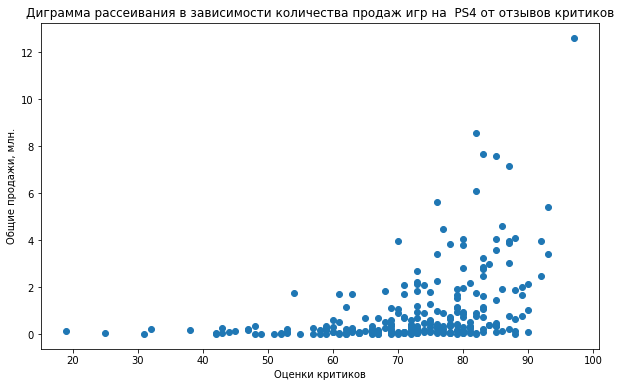

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_critics['Critic_Score'], y = df_critics['total_sales'])
plt.title("Диграмма рассеивания в зависимости количества продаж игр на  PS4 от отзывов критиков")
plt.xlabel("Оценки критиков")
plt.ylabel("Общие продажи, млн.")
plt.show()

Наблюдаем повышение количества точек с повышением оценок критиков. Начиная от оценки в 70 баллов намного больше точек не около нуля, есть одна точка на оценке приблизительно в сто баллов, где продажи максимальны.Проделаем ту же самую работу для отзывов пользователей.

In [23]:
df_critics['User_Score'].isnull().sum()

2

Так как в этом срезе уже нет в столбце User_Score нулевых значений, новый срез делать не нужно.

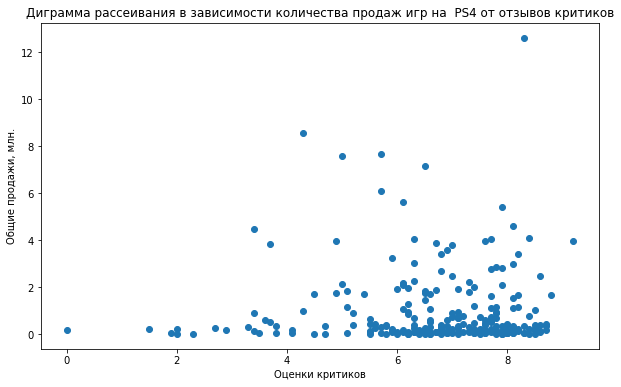

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_critics['User_Score'], y = df_critics['total_sales'])
plt.title("Диграмма рассеивания в зависимости количества продаж игр на  PS4 от отзывов критиков")
plt.xlabel("Оценки критиков")
plt.ylabel("Общие продажи, млн.")
plt.show()

Наблюдаем так же картину, что от оценки в 6 баллов продажи постепенно повышаются. Есть несколько выбивающихся из статистики значения в диапазоне оценок от 4 до 8.5 . В среднем на более низких оценках наблюдается всплекс роста продаж, чем от оценок критиков.
Теперь посчитаем коэффициент корреляции между оценками пользователей и общими продажами

In [25]:
x = df_critics[["total_sales","User_Score"]] 
x.corr()

,total_sales,User_Score
total_sales,1.000000,-0.023448
User_Score,-0.023448,1.000000


Коэффициент корреляции отрицательный, почти равен нулю. Зависимость очень слабая и отрицательная между продажами от отзывами пользователей. 
Теперь считаем коэффициент корреляции между оценками критиков и общими продажами

In [26]:
y = df_critics[["total_sales","Critic_Score"]] 
y.corr()

,total_sales,Critic_Score
total_sales,1.000000,0.406568
Critic_Score,0.406568,1.000000


Коэффициент корреляции не равен нулю и положительный, но всё ещё маленький, значит, связь между продажами и отзывами критиков есть, чуть более сильная положительная, но всё ещё слабая.
Далее посмотрим на общее распределение игр по жанрам. 

In [27]:
portret_df =  df1_games.query('Year_of_Release in["2012","2013","2014","2015","2016"]')
df_genre =  (portret_df .pivot_table(index = ['Platform','Genre','Year_of_Release'],values = ['total_sales'],aggfunc = 'sum').reset_index())
df_genre.columns = ['Platform','Genre','Year_of_Release','total_sales']
df_genre.head(10)

,Platform,Genre,Year_of_Release,total_sales
0,3ds,action,2012,11.45
1,3ds,action,2013,11.98
2,3ds,action,2014,3.64
3,3ds,action,2015,13.27
4,3ds,action,2016,5.15
5,3ds,adventure,2012,0.97
6,3ds,adventure,2013,1.76
7,3ds,adventure,2014,0.88
8,3ds,adventure,2015,0.19
9,3ds,adventure,2016,0.50


Наёдем общее количество жанров

In [28]:
df_genre['Genre'].value_counts()

action          48
misc            47
sports          44
adventure       40
role-playing    36
fighting        34
platform        33
shooter         33
simulation      31
strategy        30
racing          29
puzzle          14
Name: Genre, dtype: int64

Значит, больше всего одноименных игр было продано в жанрах: Action,Misc,Sports,Adventure и Role-Playing. Меньше всего - в жанре Misc. Посмотрим, сколько в этих пяти жанрах было продано миллионов копий.

In [29]:
print('Action:',df_genre.query('Genre == "action"')['total_sales'].sum())
print('Misc:',df_genre.query('Genre == "misc"')['total_sales'].sum())
print('Sports:',df_genre.query('Genre == "sports"')['total_sales'].sum())
print('Adventure:',df_genre.query('Genre == "adventure"')['total_sales'].sum())
print('Role-Playing:',df_genre.query('Genre == "role-playing"')['total_sales'].sum())

Action: 441.12
Misc: 85.04000000000002
Sports: 181.06999999999996
Adventure: 29.43
Role-Playing: 192.79999999999998


Построим так же сводную таблицу

In [30]:
df_genre_temp= df_genre.query('Genre in ["action","misc","sports","adventure","role-playing"]')     
df_genre_1= (df_genre_temp.pivot_table(index = ['Genre'],values = ['total_sales'],aggfunc = 'sum').reset_index()).sort_values(by = 'total_sales',ascending = False)
df_genre_1.columns = ['Genre','total_sales']
df_genre_1.head(20)

,Genre,total_sales
0,action,441.12
3,role-playing,192.80
4,sports,181.07
2,misc,85.04
1,adventure,29.43


Топ-1 более, чем в 2 раза разнится с топ-2 и топ-3 лидерами продаж. Самые популярные игры оказались и самые продаваемые. Зато игры на 5-м месте по популярности вторые по продаваемости, а на четвертом месте по популярности - аж на восьмом по продажам.
Для сравнения посмотрим топ-5 снизу

In [31]:
print('Platform  :',df_genre.query('Genre == "platform"')['total_sales'].sum())
print('Simulation  :',df_genre.query('Genre == "simulation"')['total_sales'].sum())
print('Strategy  :',df_genre.query('Genre == "strategy"')['total_sales'].sum())
print('Racing   :',df_genre.query('Genre == "racing"')['total_sales'].sum())
print('Puzzle  :',df_genre.query('Genre == "puzzle "')['total_sales'].sum())

Platform  : 61.0
Simulation  : 35.120000000000005
Strategy  : 13.34
Racing   : 53.49999999999999
Puzzle  : 0.0


Видим, что три менее популярных жанра обогнали по количеству продаж жанр Adventure, в котором было продано больше игр., причём игр жанра Platform продались более, чем в два раза успешнее.

Построим сводную таблицу

In [32]:
df_genre_temp2 = df_genre.query('Genre in ["platform","simulation","strategy","racing","puzzle"]')    
df_genre_2 = (df_genre_temp2.pivot_table(index = ['Genre'],values = ['total_sales'],aggfunc = {'median','mean','sum'}).reset_index())
df_genre_2.columns = ['Genre','median','mean','total_sales']
df_genre_2.head(5)


,Genre,median,mean,total_sales
0,platform,1.848485,0.65,61.00
1,puzzle,0.349286,0.10,4.89
2,racing,1.844828,1.19,53.50
3,simulation,1.132903,0.36,35.12
4,strategy,0.444667,0.24,13.34


# Шаг 4. Составление портрета пользователя каждого региона


Создадим таблицу с продажами в NA и посчитаем суммы продаж по каждой из платформ

In [33]:
df_portret_na = (portret_df.pivot_table(index = ['Platform'],values = ['total_sales','NA_sales'],aggfunc = 'sum').reset_index()).sort_values(by = "NA_sales",ascending = False)
df_portret_na.columns = ['Platform','NA_sales','total_sales']
df_portret_na.head(50)



,Platform,NA_sales,total_sales
9,x360,140.05,236.54
4,ps4,108.74,314.14
3,ps3,103.38,288.79
10,xone,93.12,159.32
0,3ds,55.31,194.61
8,wiiu,38.10,82.19
2,pc,19.12,62.65
7,wii,17.45,35.37
6,psv,10.98,49.18
1,ds,4.59,12.55


Наблюдаем 5 самых популярных платформ - X360, PS4, PS3, XOne, 3DS
Посмотрим, как обстоят дела в другом регионе - EU

In [34]:
df_portret_eu = (portret_df.pivot_table(index = ['Platform'],values = ['total_sales','EU_sales'],aggfunc = 'sum').reset_index()).sort_values(by = "EU_sales",ascending = False)
df_portret_eu.columns = ['Platform','EU_sales','total_sales']
df_portret_eu.head(50)

,Platform,EU_sales,total_sales
4,ps4,141.09,314.14
3,ps3,106.86,288.79
9,x360,74.52,236.54
10,xone,51.59,159.32
0,3ds,42.64,194.61
2,pc,37.76,62.65
8,wiiu,25.13,82.19
7,wii,11.92,35.37
6,psv,11.36,49.18
1,ds,3.53,12.55


Наблюдаем 5 самых популярных платформ -  PS4, PS3, X360, XOne, 3DS.
Осталось проверить обстановку в JP

In [35]:
df_portret_jp = (portret_df.pivot_table(index = ['Platform'],values = ['total_sales','JP_sales'],aggfunc = 'sum').reset_index()).sort_values(by = "JP_sales",ascending = False)
df_portret_jp.columns = ['Platform','JP_sales','total_sales']
df_portret_jp.head(50)

,Platform,JP_sales,total_sales
0,3ds,87.79,194.61
3,ps3,35.29,288.79
6,psv,21.04,49.18
4,ps4,15.96,314.14
8,wiiu,13.01,82.19
5,psp,10.47,11.19
1,ds,3.72,12.55
7,wii,3.39,35.37
9,x360,1.57,236.54
10,xone,0.34,159.32


Наблюдаем 5 самых популярных платформ - 3DS, PS3,PSV, PS4, WiiU . Показатели намного меньше, чем у NA и EU
Теперь проведём анализ топ-5 жанров

In [36]:
df_genre_na = (portret_df.pivot_table(index = ['Genre'],values = ['total_sales','NA_sales'],aggfunc = 'sum').reset_index()).sort_values(by = "NA_sales",ascending = False)
df_genre_na.columns = ['Genre','NA_sales','total_sales']
df_genre_na.head(20)

,Genre,NA_sales,total_sales
0,action,177.84,441.12
8,shooter,144.77,304.73
10,sports,81.53,181.07
7,role-playing,64.00,192.80
3,misc,38.19,85.04
4,platform,25.38,61.00
2,fighting,19.79,44.49
6,racing,17.22,53.50
1,adventure,8.92,29.43
9,simulation,7.97,35.12


Получаем топ-5 жанров для NA: Action,Shooter,Sports,Role-PLaying,Misc
Теперь посмотрим для EU

In [37]:
df_genre_eu = (portret_df.pivot_table(index = ['Genre'],values = ['total_sales','EU_sales'],aggfunc = 'sum').reset_index()).sort_values(by = "EU_sales",ascending = False)
df_genre_eu.columns = ['Genre','EU_sales','total_sales']
df_genre_eu.head(20)

,Genre,EU_sales,total_sales
0,action,159.34,441.12
8,shooter,113.47,304.73
10,sports,69.09,181.07
7,role-playing,48.53,192.80
6,racing,27.29,53.50
3,misc,26.32,85.04
4,platform,21.41,61.00
9,simulation,14.55,35.12
2,fighting,10.79,44.49
1,adventure,9.46,29.43


Топ-5 для EU выглядит так: Action,Shooter,Sports,Role-Playing,Racing
Для JP:

In [38]:
df_genre_jp = (portret_df.pivot_table(index = ['Genre'],values = ['total_sales','JP_sales'],aggfunc = 'sum').reset_index()).sort_values(by = "JP_sales",ascending = False)
df_genre_jp.columns = ['Genre','JP_sales','total_sales']
df_genre_jp.head(20)

,Genre,JP_sales,total_sales
7,role-playing,65.44,192.80
0,action,52.80,441.12
3,misc,12.86,85.04
9,simulation,10.41,35.12
2,fighting,9.44,44.49
8,shooter,9.23,304.73
4,platform,8.63,61.00
1,adventure,8.24,29.43
10,sports,8.01,181.07
11,strategy,2.88,13.34


Топ 5 для JP такой - Role-Playing, Action,Misc,Simulation,Fighting.

Осталось провести анализ влиянтия рейтинга ESRB на продажи в отдельном регионе. Проверим все три региона и сравним. 
Для начала узнаем общее количество наименований этого рейтинга

In [39]:
portret_df['Rating'].value_counts()

undefined    1275
M             498
T             412
E             395
E10+          306
Name: Rating, dtype: int64

Видим, что всего четыре возрастных рейтинга  плюс отдельный признак "undefined".

Построим табличку для рейтингов NA

In [40]:
portret_df_rating_na = (portret_df.pivot_table(index = ['Rating'],values = ['total_sales','NA_sales'],aggfunc = 'sum').reset_index()).sort_values(by = "NA_sales",ascending = False)
portret_df_rating_na.columns = ['Rating','NA_sales','total_sales']
portret_df_rating_na.head(10)

,Rating,NA_sales,total_sales
2,M,231.57,510.11
0,E,114.37,287.17
4,undefined,103.31,330.82
1,E10+,75.70,155.49
3,T,66.02,162.94


Наблюдаем, что с рейтингом M, где преобладает насилие и игры для взрослых, продаж намного больше, чем остальных категориях.
Игры для подростков самые непопулярные

In [41]:
portret_df_rating_eu = (portret_df.pivot_table(index = ['Rating'],values = ['total_sales','EU_sales'],aggfunc = 'sum').reset_index()).sort_values(by = "EU_sales",ascending = False)
portret_df_rating_eu.columns = ['Rating','EU_sales','total_sales']
portret_df_rating_eu.head(10)

,Rating,EU_sales,total_sales
2,M,193.96,510.11
0,E,113.03,287.17
4,undefined,91.50,330.82
1,E10+,55.37,155.49
3,T,52.96,162.94


Наблюдаем похожую картину - игры для взрослых пользуются большим спросом, для подростков - и детей - меньшим. C неопределённым рейтингом игры на третьем месте

In [42]:
portret_df_rating_jp = (portret_df.pivot_table(index = ['Rating'],values = ['total_sales','JP_sales'],aggfunc = 'sum').reset_index()).sort_values(by = "JP_sales",ascending = False)
portret_df_rating_jp.columns = ['Rating','JP_sales','total_sales']
portret_df_rating_jp.head(10)

,Rating,JP_sales,total_sales
4,undefined,108.84,330.82
0,E,28.33,287.17
3,T,26.02,162.94
2,M,21.20,510.11
1,E10+,8.19,155.49


В Японии же ситуация в корне иная. Больше всего было куплено игр без определённого рейтинга. В целом количество проданных игр в разы меньше, чем в Америке и Европе

# Шаг 5. Проверка гипотез


Сформируем нулевую гипотезу Ho : средние двух генеральных совокупностей равны между собой. Тогда альтернативная гипотеза H1 гласит : средние двух генеральных совокупностей не равны.
Проверим гипотезу o равенстве средних двух генеральных совокупностей: рейтинга платформ XBOX и PC. equal_var задаём равным False, потому что дисперсия разная. Alpha задаём в обоимх гипотезах равным 0.05 - 5%  доверительный интервал 

In [43]:
sample_df = portret_df.query('User_Score >0')
sample_xone= sample_df.query('Platform == "XOne"')['User_Score']
sample_pc = sample_df.query('Platform == "PC"')['User_Score']
results = st.ttest_ind(sample_xone, sample_pc, equal_var = False)
alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: nan
Не получилось отвергнуть нулевую гипотезу


Вывод : Мы не опровергли гипотезу, что пользовательский рейтинг XBOX и PC отличаются. Значит, они примерно отличаются
Проверим гипотезу о неравенстве средних двух генеральных совокупностей: рейтинга жанра Acrion и Sports.

In [44]:
sample_action= sample_df.query('Genre == "Action"')['User_Score']
sample_sports = sample_df.query('Genre == "Sports"')['User_Score']
results = st.ttest_ind(sample_action, sample_sports, equal_var = False)
alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue > alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: nan
Не получилось отвергнуть нулевую гипотезу


Вывод: Мы не опровергли гипотезу о том, что пользовательский рейтинг жанров Action и Sports различается. Значит, они разные.

# Шаг 6. Общий вывод

В данной работе был проведён анализ игровых платформ на базе данных за более, чем двадцать прошлых лет. Были приведены типы данных к другой точности в некоторых столбцах, была проведена работа с пропущенными значениями. Было посчитано, сколько игр выпускалось в разные годы. Было выявлено, за какой период времени будет проводиться дальнейшее исследование - это период с 2012-го по 2016-ый годы. Был посчитан и добавлен столбец с общим количеством продаж Был посчитан топ-10 самых прибыльных платформ за всё время исследования. Была построена тепловая карта для топ-10 самых прибыльных платформ и на её основке выявлены временные рамки, которые позволили прогнозировать покупательское поведение за 2017-ый год. Было построено распределение игр в разбивке по платформам за эти временные рамки. Были построены диаграммы рассеивания для PS4 по оценка критиков и пользователей. Были посчитаны коэффициенты корреляции для оценок критиков к суммарнымх продажам и оценок пользователей к суммарным продажам.Было проанализировано общее распределение игр по жанрам. Так же был составлен портер пользователя для каждого региона. Затем было проанализировано5 популярных платформ и жанров каждого региона и выявлена разница. Было проанализировано, влияет ли рейтинг ESRB на продажи в отдельном регионе и проверено две гипотезы: o равенстве средних двух генеральных совокупностей рейтинга платформы XBox и PC и о неравенстве двух негеральных совокупностей рейтинга жанров Action и Sports.

# Шаг 7. Чек-лист готовности проекта

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано, сколько игр выпускалось в разные годы
- [x]  выявлено, за какой период времени будет проводиться дальнейшее исследование
- [x]  посчитан и добавлен столбец с общим количеством продаж
- [x]  посчитано топ-10 самых прибыльных платформ за все время исследования
- [x]  построена тепловая карта для топ-10 самых прибыльных платформ
- [x]  выявлены временные рамки, которые позволят провести исследование на теоретическое покупательское поведение за 2017-ый год.
- [x] построено распределение игр в разбивке по платформам за эти временные рамки
- [x] построены диаграммы рассеивания для PS4 по оценкам критиков и пользователей
- [x] посчитаны коэффициенты корреляции для оценок критиков к суммарным продажами для оценок пользователей к суммарным продажам.
- [x] проанализировано общее распределение игр по жанрам. 
- [x] составлен портрет пользователя каждого региона
- [x]  проанализировано 5 популярных платформ каждого региона
- [x]  проанализировано 5 жанров каждого региона. Выявлена разница.
- [x]  проанализировано, влияет ли рейтинг ESRB на продажи в отдельном регионе
- [x]  проверено две гипотезы: o равенстве средних двух генеральных совокупностей рейтинга платформы XBox и PC и о неравенстве двух негеральных совокупностей рейтинга жанров Action и Sports
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод